In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# 1) load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2) reshape -> CNN expects H,W,Channels
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3) one-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# 4) define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 5) compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6) train
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 7) evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", acc)

c:\Users\Hrishita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9494 - loss: 0.1697 - val_accuracy: 0.9867 - val_loss: 0.0475
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9840 - loss: 0.0508 - val_accuracy: 0.9888 - val_loss: 0.0415
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9862 - val_loss: 0.0466
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9912 - val_loss: 0.0337
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9925 - val_loss: 0.0285
Test accuracy: 0.9911999702453613


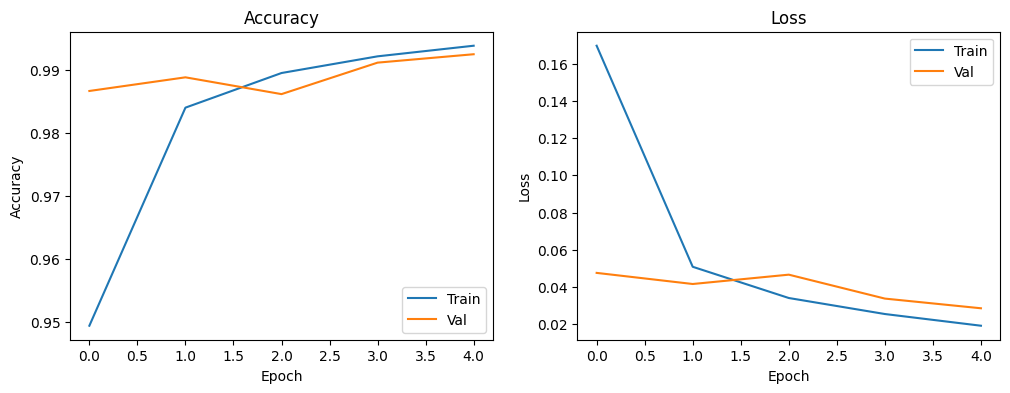

In [3]:
import matplotlib.pyplot as plt

history = model.history.history

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"])

plt.subplot(1,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Val"])

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


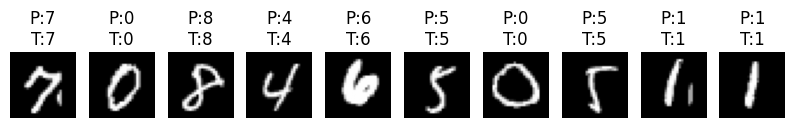

In [4]:
predictions = model.predict(X_test)

# show 10 random test images and predicted label
import numpy as np

plt.figure(figsize=(10,2))
for i in range(10):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx].reshape(28,28)
    pred_label = np.argmax(predictions[idx])
    true_label = np.argmax(y_test[idx])

    plt.subplot(1,10,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P:{pred_label}\nT:{true_label}")
    plt.axis('off')

plt.show()